<a href="https://colab.research.google.com/github/Yospy/Screwdriver-Mask-Detection-using-RCNN/blob/main/Screwdriver_Mask_Detection_RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

In [1]:
%tensorflow_version 1.x
!pip install --upgrade h5py==2.10.0
!wget https://pysource.com/extra_files/Mask_RCNN_basic_1.zip
!unzip Mask_RCNN_basic_1.zip
import sys
sys.path.append("/content/Mask_RCNN/mrcnn")
from m_rcnn import *
%matplotlib inline

TensorFlow 1.x selected.
     |████████████████████████████████| 2.9 MB 5.4 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
--2022-05-12 06:14:26--  https://pysource.com/extra_files/Mask_RCNN_basic_1.zip
Resolving pysource.com (pysource.com)... 172.67.180.33, 104.21.67.193, 2606:4700:3031::6815:43c1, ...
Connecting to pysource.com (pysource.com)|172.67.180.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1282557 (1.2M) [application/zip]
Saving to: ‘Mask_RCNN_basic_1.zip’

Mask_RCNN_basic_1.z 100%[===================>]   1.22M  --.-KB/s    in 0.08s   

2022-05-12 06:14:26 (15.1 MB/s) - ‘Mask_RCNN_basic_1.zip’ saved [1282557/1282557]

Archive:  Mask_RCNN_basic_1.zip
   creating: Mask_RCNN/
  inflating: Mask_RCNN/.gitignore    
   creating: Mask_RCNN/assets/
   creating: Mask_RCNN/images/
  inflating: Mask_RCNN/LICENSE       
  inflating: Mask_RCNN/MANIFEST.in 

Using TensorFlow backend.


... done downloading pretrained model!


In [2]:
!nvidia-smi

Thu May 12 06:16:57 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Load Image dataset


In [7]:
image_path = "dataset.zip"
label_path = "annotations.json"

extract_images(os.path.join("/content/",image_path), "/content/dataset")

Extracted: 43 images


In [8]:
train_data = load_image_dataset(os.path.join("/content/",label_path), "/content/dataset", "train")
test_data = load_image_dataset(os.path.join("/content/",label_path), "/content/dataset", "test")

class_number = train_data.count_classes()
print('Train: %d' %len(train_data.image_ids))
print("Classes : {} ".format(class_number))

Annotation json path:  /content/annotations.json
Annotation json path:  /content/annotations.json
Train: 39
Classes : 1 


## Training

In [9]:
config = CustomConfig(class_number)
model = load_training_model(config)

/content/Mask_RCNN/mask_rcnn_coco.h5


In [10]:
train_head(model, train_data, train_data, config)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/Mask_RCNN/logs/object20220512T0621/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn

# Testing Model on a random image

In [11]:
test_model, inference_config = load_test_model(class_number)



Instructions for updating:
Use `tf.cast` instead.
Loading weights from  /content/Mask_RCNN/logs/object20220512T0621/mask_rcnn_object_0005.h5
Re-starting from epoch 5


original_image           shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
Trained model result
Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32
Annotation


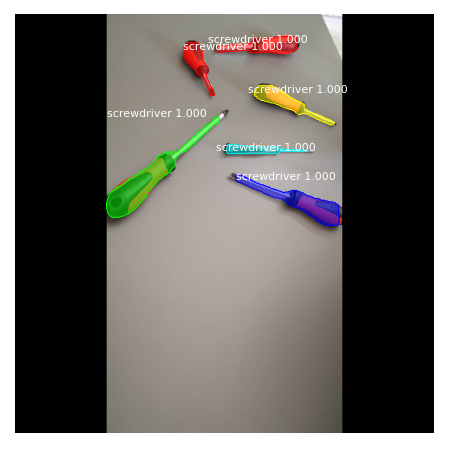

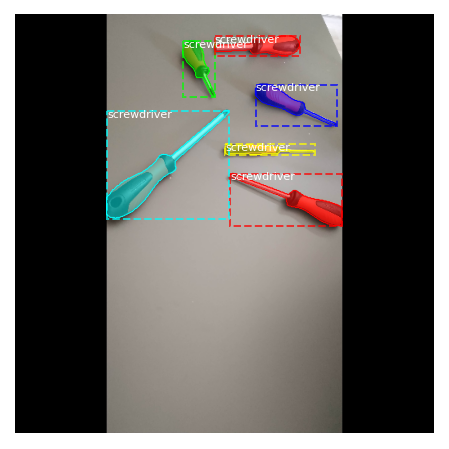

In [12]:
test_random_image(test_model, test_data, inference_config)